In [ ]:
import random as r # Genera los números aleatorios para decidir el paso
import matplotlib.pyplot as plt # Se encarga de graficar el recorrido de la caminata
import numpy as np # Para   funciones estadísticas

### Función de paso aleatorio

Similar al "volado" de una moneda, decidimos en cada paso si nos movemos a la derecha (+1) o a la izquierda (-1):

In [ ]:
def paso(p):
    """Retorna +1 con probabilidad p, -1 con probabilidad (1-p)"""
    if r.random() <= p:
        return 1   # derecha
    else:
        return -1  # izquierda

### Simular una caminata completa

Generamos una trayectoria de $n$ pasos, comenzando en la posición 0:

In [ ]:
def caminata(n_pasos, p):
    """Simula una caminata aleatoria de n_pasos con probabilidad p"""
    posicion = 0
    trayectoria = [posicion]

    for i in range(n_pasos):
        posicion += paso(p)
        trayectoria.append(posicion)

    return trayectoria

In [ ]:
# Parámetros de la simulación
p = 0.5       # Probabilidad de moverse a la derecha
q = 1 - p     # Probabilidad de moverse a la izquierda
n_pasos = 50  # Número de pasos por trayectoria
n_caminos = 6 # Número de trayectorias a simular

print(f"p = {p}, q = {q}")
print(f"Desplazamiento esperado: {n_pasos * (p - q):.2f}")

p = 0.5, q = 0.5
Desplazamiento esperado: 0.00


In [ ]:
# Simular múltiples caminatas
trayectorias = []
for i in range(n_caminos):
    trayectorias.append(caminata(n_pasos, p))

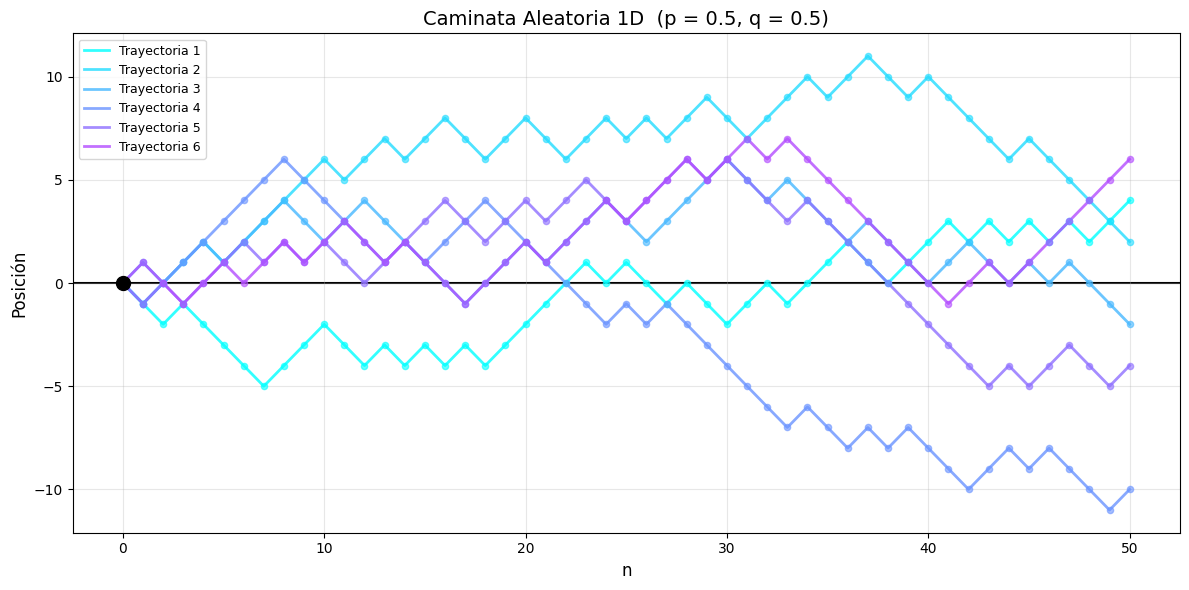

In [ ]:
# Configuración de colores (tonos azul/cian)
colores = plt.cm.cool(np.linspace(0, 0.7, n_caminos))

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Dibujar el eje horizontal (y=0) destacado
plt.axhline(y=0, color='black', linewidth=1.5, zorder=1)

# Dibujar cada trayectoria
for i, trayectoria in enumerate(trayectorias):
    pasos_x = list(range(len(trayectoria)))
    plt.plot(pasos_x, trayectoria, color=colores[i],
             linewidth=2, alpha=0.8, label=f'Trayectoria {i+1}')
    plt.scatter(pasos_x, trayectoria, color=colores[i],
                s=20, alpha=0.6, zorder=3)

# Marcar el origen
plt.scatter(0, 0, color='black', s=100, zorder=5, marker='o')

# Configurar la gráfica
plt.xlabel('n', fontsize=12)
plt.ylabel('Posición', fontsize=12)
plt.title(f'Caminata Aleatoria 1D  (p = {p}, q = {q})', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=9)
plt.tight_layout()
plt.show()

## Definición Matemática

Sea $X_n$ la posición en el paso $n$. La caminata comienza en el origen:

$$X_0 = 0$$

En cada paso, la partícula se mueve según:

$$X_{n+1} = X_n + \xi_n$$

donde $\xi_n$ es una variable aleatoria que toma valores:

$$
\xi_n =
\begin{cases}
+1 & \text{con probabilidad } p \\
-1 & \text{con probabilidad } q = 1-p
\end{cases}
$$

## Propiedades Estadísticas

### Valor esperado

El desplazamiento esperado después de $n$ pasos es:

$$\mathbb{E}[X_n] = n(p - q) = n(2p - 1)$$

### Varianza

La varianza de la posición crece linealmente con el tiempo:

$$\text{Var}(X_n) = 4npq = 4np(1-p)$$

### Caso especial: $p = q = 0.5$

Cuando $p = q = 0.5$ (caminata **simétrica**), el valor esperado es cero:

$$\mathbb{E}[X_n] = 0$$

y la varianza se simplifica a:

$$\text{Var}(X_n) = n$$

In [ ]:
# Extraer posiciones finales de cada trayectoria
# [-1] toma el último elemento de cada lista
posiciones_finales = []
for trayectoria in trayectorias:
    posicion_final = trayectoria[-1]
    posiciones_finales.append(posicion_final)

# Calcular estadísticas observadas
media_observada = np.mean(posiciones_finales)
desv_observada = np.std(posiciones_finales, ddof=1)  # ddof=1 para muestra

# Calcular valores teóricos
media_teorica = n_pasos * (p - q)
desv_teorica = np.sqrt(4 * n_pasos * p * q)

print("="*50)
print(f"Análisis de {n_caminos} trayectorias con {n_pasos} pasos")
print("="*50)
print(f"\nDesplazamiento medio:")
print(f"  Observado: {media_observada:.2f}")
print(f"  Teórico:   {media_teorica:.2f}")
print(f"\nDesviación estándar:")
print(f"  Observada: {desv_observada:.2f}")
print(f"  Teórica:   {desv_teorica:.2f}")
print(f"\nRango de posiciones finales: [{min(posiciones_finales)}, {max(posiciones_finales)}]")

Análisis de 6 trayectorias con 50 pasos

Desplazamiento medio:
  Observado: -0.67
  Teórico:   0.00

Desviación estándar:
  Observada: 5.89
  Teórica:   7.07

Rango de posiciones finales: [-10, 6]


## Análisis y Conclusiones


A partir de las simulaciones realizadas, podemos extraer las siguientes conclusiones:

#### 1. **Comportamiento según el sesgo**

- **Caso simétrico ($p = 0.5$)**: Cuando las probabilidades son iguales, la partícula no tiene una dirección preferida. El desplazamiento esperado es $\mathbb{E}[X_n] = 0$, aunque las trayectorias individuales pueden alejarse bastante del origen.

- **Caso sesgado ($p \neq 0.5$)**: Cuando $p > 0.5$, las trayectorias tienden a desplazarse hacia la derecha; cuando $p < 0.5$, tienden hacia la izquierda. El sesgo es más notorio conforme aumenta el número de pasos.

#### 2. **Convergencia estadística**

Los valores observados en las simulaciones se acercan a los valores teóricos conforme aumentamos el número de trayectorias. Esto es una manifestación de la **Ley de los Grandes Números**: al promediar muchas realizaciones aleatorias independientes, el resultado se aproxima al valor esperado.

#### 3. **Dispersión de las trayectorias**

La desviación estándar $\sigma = \sqrt{4npq}$ crece como $\sqrt{n}$, lo que significa que:

- La **incertidumbre** en la posición crece con el tiempo, pero más lentamente que el número de pasos
- Después de $n$ pasos, la mayoría de las partículas se encuentran aproximadamente dentro del rango $[\mu - 2\sigma, \mu + 2\sigma]$

#### 4. **Distribución de posiciones finales**

El histograma de posiciones finales muestra una distribución aproximadamente **normal** (Gaussiana). Esto es consecuencia del **Teorema del Límite Central**: la suma de muchas variables aleatorias independientes tiende a seguir una distribución normal, sin importar la distribución individual de cada variable.

### Conclusión general

Este modelo, a pesar de su simplicidad, captura comportamientos fundamentales de sistemas estocásticos. La caminata aleatoria demuestra cómo procesos aparentemente caóticos pueden ser descritos y predichos mediante herramientas matemáticas.